## CIFAR 10 Classification using Deep Learning

CIFAR-10 is a dataset which contains several images and they are divided into 10 classes. birds,cats,deer,dogs,frogs,ships, trucks,airplanes,horses, and cars. It consists of 60K 32X32 imahes of each class.

Data Soure : https://www.cs.toronto.edu/~kriz/cifar.html

The images would be classified  into their various classes using deep learning models.


Each number would be representing a name of each class in the dataset
[0] - Planes [1] - Cars [2] -Bird [3] -Cats [4] - Deer [5] - Dogs [6] -Frogs [7] - Horses [8] -Ships [9] - Trucks


In [1]:
#Importing the necessary libraries

import numpy as np
import tensorflow
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Import the CIFAR 10 dataset and load it into training and testing datasets.

In [2]:
(X_train, y_train),(X_test, y_test) = tensorflow.keras.datasets.cifar10.load_data()


In [3]:
X_train.shape # 32X32 pixels , Coloured Scaled Image (RGB) ; 50,000 images for training

(50000, 32, 32, 3)

In [4]:
X_test.shape # 10,0000 images for testing

(10000, 32, 32, 3)

In [5]:
y_test.shape

(10000, 1)

label =[8]


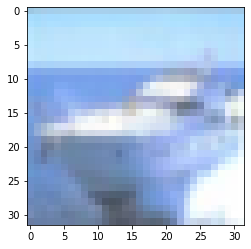

In [6]:
import random 
i = random.randint(1, len(X_train))

plt.imshow(X_train[i])
print('label ={}'.format(y_train[i]))

Visualizing 100 random images in CIFAR-10  with their corresponding labels

c:\Users\moyin\anaconda3\lib\site-packages\matplotlib\text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


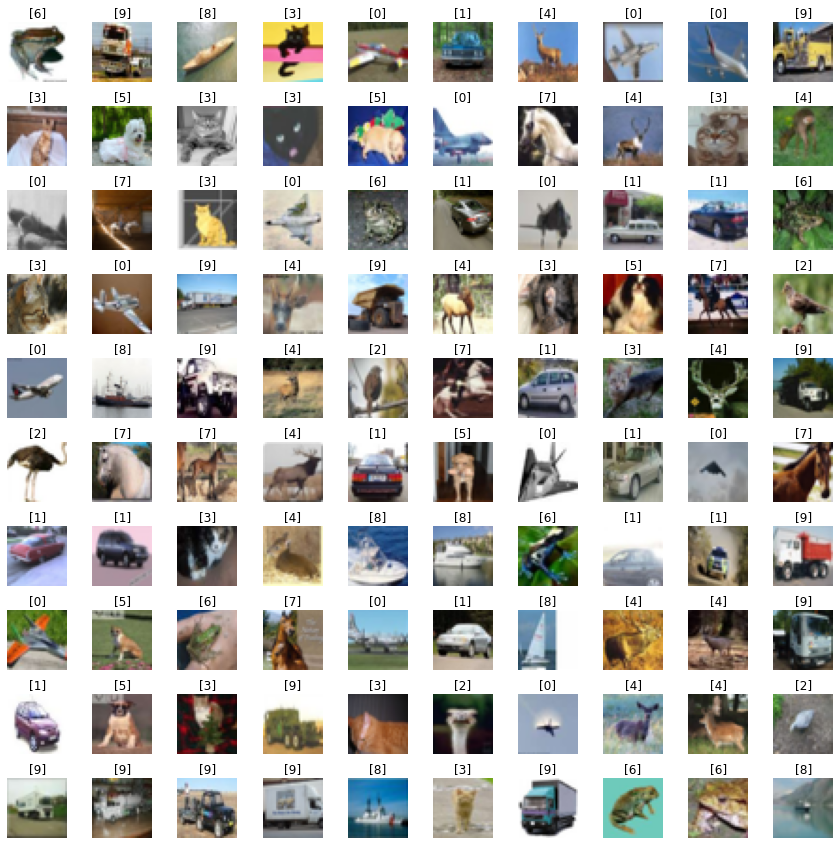

In [7]:
#Viewing 100 images and their corresponding labels

W_grid = 10
L_grid = 10

fig, axes = plt.subplots(L_grid,W_grid, figsize = (15,15))
axes = axes.ravel()

n_training = len(X_train)

for i in np.arange(0,L_grid*W_grid):
    index = np.random.randint(0,n_training)
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index])
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)



In [8]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

NumberOfCategory = 10 


Converting the training and testing outcomes using `keras.utils.to_categorical` to categorical data. (array ranging from 0 to 1) 

In [9]:

y_train = tensorflow.keras.utils.to_categorical(y_train,NumberOfCategory)
y_test = tensorflow.keras.utils.to_categorical(y_test,NumberOfCategory)

Normalizing the training dataset and testing dataset to values between 0 and 1

In [10]:
X_train = X_train/255
X_test = X_test/255

In [11]:
InputShape = X_train.shape[1:]

Using Convolution Layers and Pooling Layers, respectively, the images would be fed into the model and then fed into a neural network which would classify and predict the classes of the images.

In [16]:
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential


cnn_layer_01 = [Conv2D(32,(3,3), activation = "relu",input_shape =InputShape),
                Conv2D(32,(3,3), activation = "relu"),
                MaxPooling2D(2,2),
                Dropout(0.3)]

cnn_layer_02 = [Conv2D(64,(3,3), activation = "relu"),
                Conv2D(64,(3,3), activation = "relu"),
                MaxPooling2D(2,2),
                Dropout(0.3)]

flatten_layer = [Flatten()]

dense_neuralnetwork = [Dense(1024,activation = "relu"),
                       Dropout(0.3)]
        
dense_neuralnetwork_02 = [Dense(1024,activation = "relu")]


activation_function = [Dense(10,activation = "softmax")]


In [17]:
model = Sequential(cnn_layer_01 + cnn_layer_02 + flatten_layer + dense_neuralnetwork  + dense_neuralnetwork_02 +activation_function)

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 14, 14, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 conv2d_7 (Conv2D)           (None, 10, 10, 64)        36928     
                                                      


Categorical entropy would be used as the loss because we have more than 2 categories

In [19]:
model.compile(optimizer = tensorflow.optimizers.RMSprop(0.0001,decay = 1e-6),loss= "categorical_crossentropy", metrics = ['accuracy'])

Compile the model and train the model with 100 epochs of training

In [20]:
epochs = 100
history = model.fit(X_train, y_train, batch_size = 512, epochs = epochs)

Epoch 1/100
98/98 [==============================] - 36s 354ms/step - loss: 2.1216 - accuracy: 0.2110
Epoch 2/100
98/98 [==============================] - 35s 352ms/step - loss: 1.9109 - accuracy: 0.3085
Epoch 3/100
98/98 [==============================] - 35s 352ms/step - loss: 1.7847 - accuracy: 0.3610
Epoch 4/100
98/98 [==============================] - 33s 341ms/step - loss: 1.7060 - accuracy: 0.3875
Epoch 5/100
98/98 [==============================] - 33s 339ms/step - loss: 1.6385 - accuracy: 0.4093
Epoch 6/100
98/98 [==============================] - 33s 341ms/step - loss: 1.5820 - accuracy: 0.4275
Epoch 7/100
98/98 [==============================] - 34s 343ms/step - loss: 1.5432 - accuracy: 0.4428
Epoch 8/100
98/98 [==============================] - 34s 343ms/step - loss: 1.5025 - accuracy: 0.4564
Epoch 9/100
98/98 [==============================] - 34s 343ms/step - loss: 1.4665 - accuracy: 0.4700
Epoch 10/100
98/98 [==============================] - 34s 346ms/step - loss: 1.438

In [40]:
# model_json = model.to_json()

# with open("model.json","w") as json_file:
#     json_file.write(model_json)
# model.save_weights("cifarmodel.h5")
# print("saved")



saved


In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 14, 14, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 conv2d_7 (Conv2D)           (None, 10, 10, 64)        36928     
                                                      

The trained model would be evaluated using several performacne metrics.

In [22]:
evaluation = model.evaluate(X_test,y_test)

print('Test Accuracy:{}'.format(evaluation[1]))

313/313 [==============================] - 4s 12ms/step - loss: 0.7022 - accuracy: 0.7677
Test Accuracy:0.7677000164985657


In [24]:
pred_class = model.predict(X_test)
pred_class

313/313 [==============================] - 4s 12ms/step


array([[1.59729715e-03, 6.77446544e-04, 7.64850527e-04, ...,
        4.62882046e-04, 3.26601346e-03, 1.21122175e-04],
       [1.57151895e-03, 4.72080186e-02, 6.34781770e-07, ...,
        1.20432269e-08, 9.50077534e-01, 1.14179193e-03],
       [7.23579619e-03, 3.47198665e-01, 2.94702568e-05, ...,
        9.63808488e-05, 6.24683201e-01, 2.02672873e-02],
       ...,
       [2.66811207e-06, 9.84269732e-08, 6.15346187e-04, ...,
        1.06583154e-02, 2.83398495e-05, 3.36516564e-06],
       [1.99694117e-03, 2.15092108e-01, 9.79711954e-03, ...,
        7.12370267e-04, 1.46456310e-04, 6.82921556e-04],
       [2.64268962e-09, 5.20759443e-11, 3.67862214e-07, ...,
        9.98844862e-01, 3.76691567e-10, 1.16540400e-09]], dtype=float32)

In [25]:
pred_class = pred_class.argmax(1)

In [27]:
pred_class


array([3, 8, 8, ..., 5, 4, 7], dtype=int64)

In [32]:
y_test = y_test.argmax(1)

array([3, 8, 8, ..., 5, 1, 7], dtype=int64)

Using Confusion Matrix, the performance of the model would be asssessed

<AxesSubplot:>

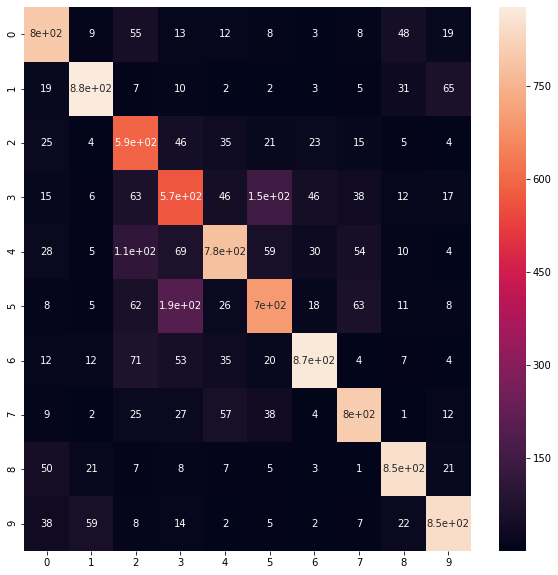

In [30]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


cm = confusion_matrix(pred_class,y_test)

plt.figure(figsize = (10,10))
sns.heatmap(cm,annot=True)


The model prediction and the true class `(y_test)` would be visualized below

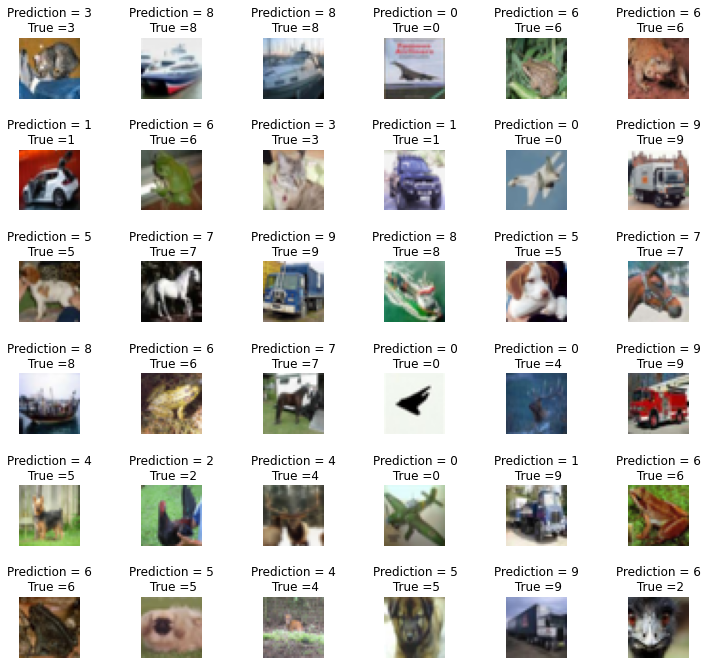

In [38]:
fig,axes = plt.subplots(6,6,figsize = (12,12))
axes = axes.ravel()


for i in np.arange(0,36):
    axes[i].imshow(X_test[i])
    axes[i].set_title("Prediction = {}\n True ={}".format(pred_class[i],y_test[i]))
    axes[i].axis('off')




plt.subplots_adjust(wspace=1)




### CONCLUSION, FINDINGS AND SUMMARY

The model was trained and assessed using the confusion matrix and its accuracy, and it did reasonably well. However, the model's accuracy can be increased if the number of epochs increases. As a result, The loss would also be reduced, and the training time would be increased.